In [884]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
import datetime as dt


In [885]:
dados1 = pd.read_csv("data_1__.csv")
dados1 = pd.DataFrame(dados1)

In [886]:
dados1 = dados1.drop(columns=['index'])

print(dados1)

           data      valor
0    2016-08-29       9.00
1    2016-08-30       1.60
2    2016-08-31   15311.70
3    2016-09-01   13932.67
4    2016-09-02   11535.45
5    2016-09-03   25864.32
6    2016-09-04  161344.35
7    2016-09-07   46380.31
8    2016-09-08    7341.94
9    2016-09-09   20184.57
10   2016-09-10   28359.77
11   2016-09-11   91701.65
12   2016-09-14   14836.67
13   2016-09-15   12446.20
14   2016-09-16   12083.45
15   2016-09-17   31864.65
16   2016-09-18   94610.57
17   2016-09-21   16865.56
18   2016-09-22    9134.95
19   2016-09-23   17733.30
20   2016-09-25  115505.50
21   2016-09-26     580.40
22   2016-09-28   18110.85
23   2016-09-29    7492.46
24   2016-09-30    5652.10
25   2016-10-01   84379.41
26   2016-10-02   87796.85
27   2016-10-05   16684.48
28   2016-10-06    6360.95
29   2016-10-07   13873.31
..          ...        ...
559  2018-09-20   11448.55
560  2018-09-21   32258.55
561  2018-09-22   17948.50
562  2018-09-23   99973.90
563  2018-09-26   13598.15
5

In [887]:
dados2 = pd.read_csv("data_2__.csv")
dados3 = pd.read_csv("data_3__.csv")
dados4 = pd.read_csv("data_4__.csv")
dados2 = dados2.drop(columns=['index'])
dados3 = dados3.drop(columns=['index'])
dados4 = dados4.drop(columns=['Srore_id', 'Product id'])
#dados3 =
#dados4 = 
print(dados2)
print(dados3)
print(dados4)

            data     valor
0     2014-07-18      1.50
1     2014-08-05     83.20
2     2014-08-08     22.50
3     2014-08-11     15.91
4     2014-08-12      0.44
5     2014-08-13   1393.49
6     2014-08-14   2100.92
7     2014-08-15   2882.71
8     2014-08-16   3893.80
9     2014-08-17   3774.72
10    2014-08-18   1687.77
11    2014-08-19   1091.96
12    2014-08-20   1659.50
13    2014-08-21   1737.11
14    2014-08-22   3388.52
15    2014-08-23   4107.50
16    2014-08-24   4626.87
17    2014-08-25   1760.93
18    2014-08-26   1640.58
19    2014-08-27   2107.75
20    2014-08-28   2690.52
21    2014-08-29   3385.84
22    2014-08-30   5117.44
23    2014-08-31   5058.88
24    2014-09-01   2284.99
25    2014-09-02   1918.14
26    2014-09-03   2508.91
27    2014-09-04   2015.57
28    2014-09-05   4133.71
29    2014-09-06   4774.22
...          ...       ...
1512  2018-10-02  11745.41
1513  2018-10-03  12396.01
1514  2018-10-04  12038.50
1515  2018-10-05  16057.87
1516  2018-10-06  22377.21
1

In [888]:
dados1.values[:,0]

array(['2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01',
       '2016-09-02', '2016-09-03', '2016-09-04', '2016-09-07',
       '2016-09-08', '2016-09-09', '2016-09-10', '2016-09-11',
       '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-17',
       '2016-09-18', '2016-09-21', '2016-09-22', '2016-09-23',
       '2016-09-25', '2016-09-26', '2016-09-28', '2016-09-29',
       '2016-09-30', '2016-10-01', '2016-10-02', '2016-10-05',
       '2016-10-06', '2016-10-07', '2016-10-09', '2016-10-12',
       '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16',
       '2016-10-19', '2016-10-20', '2016-10-22', '2016-10-23',
       '2016-10-24', '2016-10-26', '2016-10-27', '2016-10-28',
       '2016-10-29', '2016-10-30', '2016-10-31', '2016-11-01',
       '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-05',
       '2016-11-06', '2016-11-09', '2016-11-10', '2016-11-11',
       '2016-11-12', '2016-11-13', '2016-11-14', '2016-11-15',
       '2016-11-16', '2016-11-17', '2016-11-18', '2016-

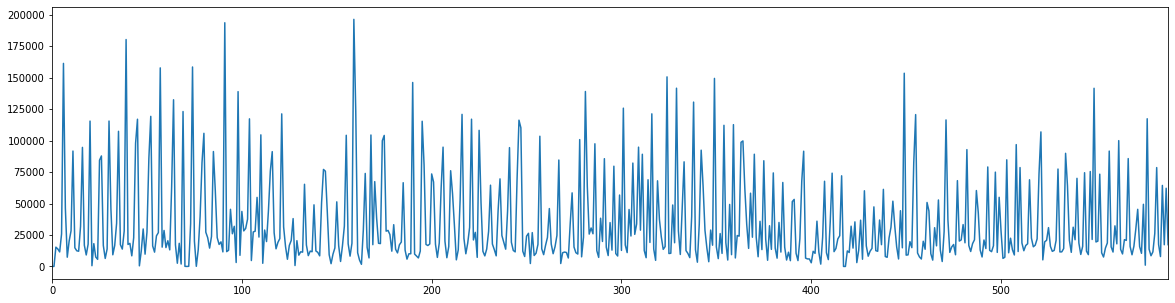

In [889]:
dados1.valor.plot(figsize=(20,5))

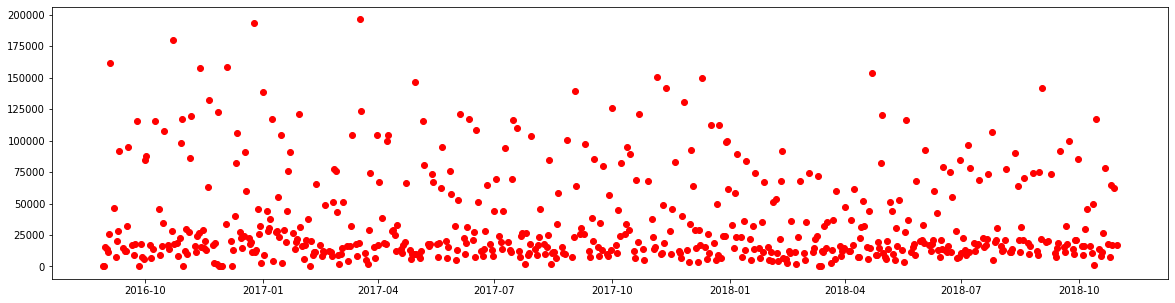

In [890]:
plt.figure(figsize=(20,5))
dates = dados1.values[:,0]
dates = [pd.to_datetime(d) for d in dates]
plt.plot_date(dates, dados1.values[:,1], c = 'red')

In [891]:
dados1.data = pd.to_datetime(dados1.data)

dadosMes1 = (dados1.groupby('data').valor.sum()).groupby([(dados1.groupby('data').valor.sum()).index.month, (dados1.groupby('data').valor.sum()).index.year, (dados1.groupby('data').valor.sum()).index.day]).cumsum().reset_index()

print(dadosMes1)

          data      valor
0   2016-08-29       9.00
1   2016-08-30       1.60
2   2016-08-31   15311.70
3   2016-09-01   13932.67
4   2016-09-02   11535.45
5   2016-09-03   25864.32
6   2016-09-04  161344.35
7   2016-09-07   46380.31
8   2016-09-08    7341.94
9   2016-09-09   20184.57
10  2016-09-10   28359.77
11  2016-09-11   91701.65
12  2016-09-14   14836.67
13  2016-09-15   12446.20
14  2016-09-16   12083.45
15  2016-09-17   31864.65
16  2016-09-18   94610.57
17  2016-09-21   16865.56
18  2016-09-22    9134.95
19  2016-09-23   17733.30
20  2016-09-25  115505.50
21  2016-09-26     580.40
22  2016-09-28   18110.85
23  2016-09-29    7492.46
24  2016-09-30    5652.10
25  2016-10-01   84379.41
26  2016-10-02   87796.85
27  2016-10-05   16684.48
28  2016-10-06    6360.95
29  2016-10-07   13873.31
..         ...        ...
559 2018-09-20   11448.55
560 2018-09-21   32258.55
561 2018-09-22   17948.50
562 2018-09-23   99973.90
563 2018-09-26   13598.15
564 2018-09-27    9937.20
565 2018-09-

In [892]:
dados2.data = pd.to_datetime(dados2.data)

dadosMes2 = (dados2.groupby('data').valor.sum()).groupby([(dados2.groupby('data').valor.sum()).index.month, (dados2.groupby('data').valor.sum()).index.year, (dados2.groupby('data').valor.sum()).index.day]).cumsum().reset_index()

print(dadosMes2)

           data     valor
0    2014-07-18      1.50
1    2014-08-05     83.20
2    2014-08-08     22.50
3    2014-08-11     15.91
4    2014-08-12      0.44
5    2014-08-13   1393.49
6    2014-08-14   2100.92
7    2014-08-15   2882.71
8    2014-08-16   3893.80
9    2014-08-17   3774.72
10   2014-08-18   1687.77
11   2014-08-19   1091.96
12   2014-08-20   1659.50
13   2014-08-21   1737.11
14   2014-08-22   3388.52
15   2014-08-23   4107.50
16   2014-08-24   4626.87
17   2014-08-25   1760.93
18   2014-08-26   1640.58
19   2014-08-27   2107.75
20   2014-08-28   2690.52
21   2014-08-29   3385.84
22   2014-08-30   5117.44
23   2014-08-31   5058.88
24   2014-09-01   2284.99
25   2014-09-02   1918.14
26   2014-09-03   2508.91
27   2014-09-04   2015.57
28   2014-09-05   4133.71
29   2014-09-06   4774.22
...         ...       ...
1512 2018-10-02  11745.41
1513 2018-10-03  12396.01
1514 2018-10-04  12038.50
1515 2018-10-05  16057.87
1516 2018-10-06  22377.21
1517 2018-10-07  11441.12
1518 2018-10

In [893]:
dados3.data = pd.to_datetime(dados3.data)

dadosMes3 = (dados3.groupby('data').valor.sum()).groupby([(dados3.groupby('data').valor.sum()).index.month, (dados3.groupby('data').valor.sum()).index.year,(dados3.groupby('data').valor.sum()).index.day]).cumsum().reset_index()

print(dadosMes3)

         data     valor
0  2018-08-21   3914.55
1  2018-08-22   3713.02
2  2018-08-23   8001.75
3  2018-08-24  11312.95
4  2018-08-25  15230.01
5  2018-08-26  11208.81
6  2018-08-27   3142.40
7  2018-08-28   3027.20
8  2018-08-29   4926.52
9  2018-08-30   8065.26
10 2018-08-31  10508.20
11 2018-09-01  17168.31
12 2018-09-02  13380.50
13 2018-09-03   2833.27
14 2018-09-04   4544.58
15 2018-09-05   6616.55
16 2018-09-06  17474.74
17 2018-09-07  18605.45
18 2018-09-08  14013.45
19 2018-09-09  11398.83
20 2018-09-10   2994.14
21 2018-09-11   2321.52
22 2018-09-12   4237.98
23 2018-09-13   8980.60
24 2018-09-14  11580.41
25 2018-09-15  17847.85
26 2018-09-16  14627.79
27 2018-09-17   3183.39
28 2018-09-18   3541.42
29 2018-09-19   5449.34
..        ...       ...
42 2018-10-02   4719.77
43 2018-10-03   5325.13
44 2018-10-04  10793.82
45 2018-10-05  16439.73
46 2018-10-06  16145.05
47 2018-10-07  14954.49
48 2018-10-08   3660.66
49 2018-10-09   3445.37
50 2018-10-10   5815.37
51 2018-10-11  1

In [894]:
dados4.YearMonth = pd.to_datetime(dados4.YearMonth ,format='%Y%m')

dadosMes4 = (dados4.groupby('YearMonth').Volume.sum()).groupby([(dados4.groupby('YearMonth').Volume.sum()).index.month, (dados4.groupby('YearMonth').Volume.sum()).index.year, (dados4.groupby('YearMonth').Volume.sum()).index.day]).cumsum().reset_index()

print(dadosMes4)

    YearMonth      Volume
0  2013-01-01   7668.0000
1  2013-02-01     10.3092
2  2013-03-01     16.5288
3  2013-04-01     13.3764
4  2013-05-01     20.2776
5  2013-06-01     22.8336
6  2013-07-01     15.2508
7  2013-08-01     19.2552
8  2013-09-01  18744.0000
9  2013-10-01     19.1700
10 2013-11-01     13.0356
11 2013-12-01     14.7396
12 2014-01-01     14.1432
13 2014-02-01     16.9548
14 2014-03-01     19.7664
15 2014-04-01     13.5468
16 2014-05-01  18318.0000
17 2014-06-01     16.6992
18 2014-07-01     18.9996
19 2014-08-01     17.2956
20 2014-09-01     13.7172
21 2014-10-01     12.0000
22 2014-11-01  20022.0000
23 2014-12-01  13242.0000
24 2015-01-01  11112.0000
25 2015-02-01     12.4484
26 2015-03-01     16.5604
27 2015-04-01     11.6724
28 2015-05-01     20.9592
29 2015-06-01     23.5152
30 2015-07-01     11.5872
31 2015-08-01      8.0852
32 2015-09-01     13.5784
33 2015-10-01     12.4392
34 2015-11-01      9.5424
35 2015-12-01     12.2688
36 2016-01-01  15336.0000
37 2016-02-0

In [895]:
dadosMes1.data = pd.to_datetime(dadosMes1.data)

dadosMes1.set_index('data', inplace=True)

dadosMes2.data = pd.to_datetime(dadosMes2.data)

dadosMes2.set_index('data', inplace=True)

dadosMes3.data = pd.to_datetime(dadosMes3.data)

dadosMes3.set_index('data', inplace=True)

dadosMes4.YearMonth = pd.to_datetime(dadosMes4.YearMonth)

dadosMes4.set_index('YearMonth', inplace=True)


In [896]:
dadosMes2 = dadosMes2.resample('D', how='max')
dadosMes3 = dadosMes3.resample('D', how='max')
dadosMes4 = dadosMes4.resample('D', how='max')

/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  """Entry point for launching an IPython kernel.
/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  
/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  This is separate from the ipykernel package so we can avoid doing imports until


In [897]:
dadosMes1 = dadosMes1.resample('D', how='max')
dadosMes1 = dadosMes1.dropna()
dadosMes2 = dadosMes2.dropna()
dadosMes3 = dadosMes3.dropna()
dadosMes4 = dadosMes4.dropna()

/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).max()
  """Entry point for launching an IPython kernel.


In [898]:
dadosMes1

,valor
data,
2016-08-29,9.00
2016-08-30,1.60
2016-08-31,15311.70
2016-09-01,13932.67
2016-09-02,11535.45
2016-09-03,25864.32
2016-09-04,161344.35
2016-09-07,46380.31
2016-09-08,7341.94


In [899]:
#X_inicial.reset_index(inplace=True)
X_inicial = dadosMes1[dadosMes1.index.month<dadosMes1.index.month.max()]
print(X_inicial)

                valor
data                 
2016-08-29       9.00
2016-08-30       1.60
2016-08-31   15311.70
2016-09-01   13932.67
2016-09-02   11535.45
2016-09-03   25864.32
2016-09-04  161344.35
2016-09-07   46380.31
2016-09-08    7341.94
2016-09-09   20184.57
2016-09-10   28359.77
2016-09-11   91701.65
2016-09-14   14836.67
2016-09-15   12446.20
2016-09-16   12083.45
2016-09-17   31864.65
2016-09-18   94610.57
2016-09-21   16865.56
2016-09-22    9134.95
2016-09-23   17733.30
2016-09-25  115505.50
2016-09-26     580.40
2016-09-28   18110.85
2016-09-29    7492.46
2016-09-30    5652.10
2016-10-01   84379.41
2016-10-02   87796.85
2016-10-05   16684.48
2016-10-06    6360.95
2016-10-07   13873.31
...               ...
2018-09-20   11448.55
2018-09-21   32258.55
2018-09-22   17948.50
2018-09-23   99973.90
2018-09-26   13598.15
2018-09-27    9937.20
2018-09-28   21288.81
2018-09-29   20712.30
2018-09-30   85709.60
2018-10-03   15895.50
2018-10-04    9273.00
2018-10-05   16079.25
2018-10-06

In [901]:
X_inicial2 = dadosMes2[dadosMes2.index.month<dadosMes2.index.month.max()]
print(X_inicial2)
X_inicial3 = dadosMes3[dadosMes3.index.month<dadosMes3.index.month.max()]
print(X_inicial3)
X_inicial4 = dadosMes4[dadosMes4.index.month<dadosMes4.index.month.max()]
print(X_inicial4)

               valor
data                
2014-07-18      1.50
2014-08-05     83.20
2014-08-08     22.50
2014-08-11     15.91
2014-08-12      0.44
2014-08-13   1393.49
2014-08-14   2100.92
2014-08-15   2882.71
2014-08-16   3893.80
2014-08-17   3774.72
2014-08-18   1687.77
2014-08-19   1091.96
2014-08-20   1659.50
2014-08-21   1737.11
2014-08-22   3388.52
2014-08-23   4107.50
2014-08-24   4626.87
2014-08-25   1760.93
2014-08-26   1640.58
2014-08-27   2107.75
2014-08-28   2690.52
2014-08-29   3385.84
2014-08-30   5117.44
2014-08-31   5058.88
2014-09-01   2284.99
2014-09-02   1918.14
2014-09-03   2508.91
2014-09-04   2015.57
2014-09-05   4133.71
2014-09-06   4774.22
...              ...
2018-10-02  11745.41
2018-10-03  12396.01
2018-10-04  12038.50
2018-10-05  16057.87
2018-10-06  22377.21
2018-10-07  11441.12
2018-10-08  11824.10
2018-10-09  11556.20
2018-10-10  12886.30
2018-10-11  15108.10
2018-10-12  27351.50
2018-10-13  21690.79
2018-10-14  19021.30
2018-10-15  14308.51
2018-10-16  1

In [902]:

alvo = dadosMes1[dadosMes1.index.month==dadosMes1.index.month.max()]
alvo2 = dadosMes2[dadosMes2.index.month==dadosMes2.index.month.max()]
alvo3 = dadosMes3[dadosMes3.index.month==dadosMes3.index.month.max()]
alvo4 = dadosMes4[dadosMes4.index.month==dadosMes4.index.month.max()]
print(alvo)

                valor
data                 
2016-12-03   33939.20
2016-12-04  158495.80
2016-12-07   20070.51
2016-12-08     100.00
2016-12-09   13203.01
2016-12-10   39776.98
2016-12-11   82579.90
2016-12-12  105790.14
2016-12-14   27202.60
2016-12-15   22820.26
2016-12-16   14581.71
2016-12-17   23871.12
2016-12-18   91317.45
2016-12-19   60226.11
2016-12-21   22895.90
2016-12-22   17499.45
2016-12-23   19535.60
2016-12-24   11564.20
2016-12-25  193650.37
2016-12-26   11779.40
2016-12-27   12860.66
2016-12-28   45404.81
2016-12-29   25980.96
2016-12-30   31875.42
2016-12-31    3133.20
2017-12-01   33793.95
2017-12-02   92392.93
2017-12-03   63995.05
2017-12-05   28700.00
2017-12-06   14697.66
2017-12-07    3750.90
2017-12-08   28924.14
2017-12-09   16876.10
2017-12-10  149426.31
2017-12-13   15538.46
2017-12-14    6222.86
2017-12-15   26130.80
2017-12-16   10366.00
2017-12-17  112153.30
2017-12-20   18869.94
2017-12-21    5088.90
2017-12-22   49271.46
2017-12-23    9361.21
2017-12-24

In [903]:
print(y)
X_inicial.reset_index(level=0, inplace=True)
X = X_inicial.data
y = X_inicial['valor']
X_inicial2.reset_index(level=0, inplace=True)
X2 = X_inicial2.data
y2 = X_inicial2['valor']
X_inicial3.reset_index(level=0, inplace=True)
X3 = X_inicial3.data
y3 = X_inicial3['valor']
X_inicial4.reset_index(level=0, inplace=True)
X4 = X_inicial4.YearMonth
y4 = X_inicial4['Volume']

0          9.00
1          1.60
2      15311.70
3      13932.67
4      11535.45
5      25864.32
6     161344.35
7      46380.31
8       7341.94
9      20184.57
10     28359.77
11     91701.65
12     14836.67
13     12446.20
14     12083.45
15     31864.65
16     94610.57
17     16865.56
18      9134.95
19     17733.30
20    115505.50
21       580.40
22     18110.85
23      7492.46
24      5652.10
25     84379.41
Name: valor, dtype: float64


In [904]:
print(y)

0           9.00
1           1.60
2       15311.70
3       13932.67
4       11535.45
5       25864.32
6      161344.35
7       46380.31
8        7341.94
9       20184.57
10      28359.77
11      91701.65
12      14836.67
13      12446.20
14      12083.45
15      31864.65
16      94610.57
17      16865.56
18       9134.95
19      17733.30
20     115505.50
21        580.40
22      18110.85
23       7492.46
24       5652.10
25      84379.41
26      87796.85
27      16684.48
28       6360.95
29      13873.31
         ...    
509     11448.55
510     32258.55
511     17948.50
512     99973.90
513     13598.15
514      9937.20
515     21288.81
516     20712.30
517     85709.60
518     15895.50
519      9273.00
520     16079.25
521     29740.60
522     45392.70
523     15858.59
524     10426.85
525     49380.00
526      1006.00
527    117363.60
528     13757.00
529      8507.80
530     11581.70
531     26245.90
532     78560.85
533     17529.25
534      7865.80
535     64380.30
536     17235.

In [905]:
print(X)

0     2016-08-29
1     2016-08-30
2     2016-08-31
3     2016-09-01
4     2016-09-02
5     2016-09-03
6     2016-09-04
7     2016-09-07
8     2016-09-08
9     2016-09-09
10    2016-09-10
11    2016-09-11
12    2016-09-14
13    2016-09-15
14    2016-09-16
15    2016-09-17
16    2016-09-18
17    2016-09-21
18    2016-09-22
19    2016-09-23
20    2016-09-25
21    2016-09-26
22    2016-09-28
23    2016-09-29
24    2016-09-30
25    2016-10-01
26    2016-10-02
27    2016-10-05
28    2016-10-06
29    2016-10-07
         ...    
509   2018-09-20
510   2018-09-21
511   2018-09-22
512   2018-09-23
513   2018-09-26
514   2018-09-27
515   2018-09-28
516   2018-09-29
517   2018-09-30
518   2018-10-03
519   2018-10-04
520   2018-10-05
521   2018-10-06
522   2018-10-07
523   2018-10-10
524   2018-10-11
525   2018-10-12
526   2018-10-13
527   2018-10-14
528   2018-10-17
529   2018-10-18
530   2018-10-19
531   2018-10-20
532   2018-10-21
533   2018-10-24
534   2018-10-25
535   2018-10-26
536   2018-10-

In [906]:
print(X)


0     2016-08-29
1     2016-08-30
2     2016-08-31
3     2016-09-01
4     2016-09-02
5     2016-09-03
6     2016-09-04
7     2016-09-07
8     2016-09-08
9     2016-09-09
10    2016-09-10
11    2016-09-11
12    2016-09-14
13    2016-09-15
14    2016-09-16
15    2016-09-17
16    2016-09-18
17    2016-09-21
18    2016-09-22
19    2016-09-23
20    2016-09-25
21    2016-09-26
22    2016-09-28
23    2016-09-29
24    2016-09-30
25    2016-10-01
26    2016-10-02
27    2016-10-05
28    2016-10-06
29    2016-10-07
         ...    
509   2018-09-20
510   2018-09-21
511   2018-09-22
512   2018-09-23
513   2018-09-26
514   2018-09-27
515   2018-09-28
516   2018-09-29
517   2018-09-30
518   2018-10-03
519   2018-10-04
520   2018-10-05
521   2018-10-06
522   2018-10-07
523   2018-10-10
524   2018-10-11
525   2018-10-12
526   2018-10-13
527   2018-10-14
528   2018-10-17
529   2018-10-18
530   2018-10-19
531   2018-10-20
532   2018-10-21
533   2018-10-24
534   2018-10-25
535   2018-10-26
536   2018-10-

In [907]:
print(y)

0           9.00
1           1.60
2       15311.70
3       13932.67
4       11535.45
5       25864.32
6      161344.35
7       46380.31
8        7341.94
9       20184.57
10      28359.77
11      91701.65
12      14836.67
13      12446.20
14      12083.45
15      31864.65
16      94610.57
17      16865.56
18       9134.95
19      17733.30
20     115505.50
21        580.40
22      18110.85
23       7492.46
24       5652.10
25      84379.41
26      87796.85
27      16684.48
28       6360.95
29      13873.31
         ...    
509     11448.55
510     32258.55
511     17948.50
512     99973.90
513     13598.15
514      9937.20
515     21288.81
516     20712.30
517     85709.60
518     15895.50
519      9273.00
520     16079.25
521     29740.60
522     45392.70
523     15858.59
524     10426.85
525     49380.00
526      1006.00
527    117363.60
528     13757.00
529      8507.80
530     11581.70
531     26245.90
532     78560.85
533     17529.25
534      7865.80
535     64380.30
536     17235.

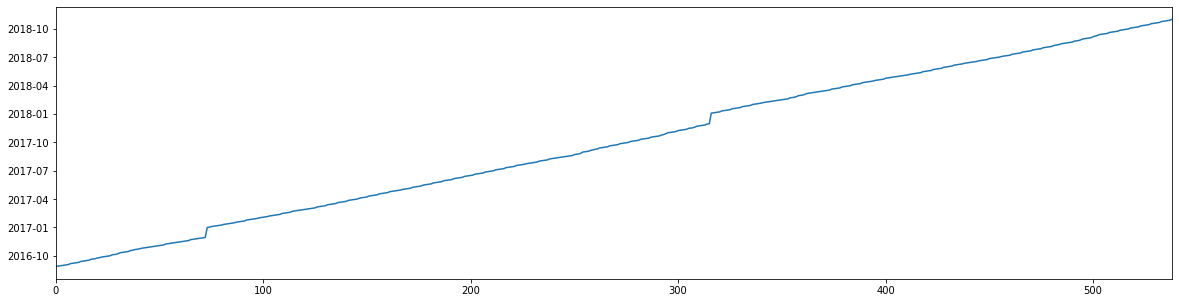

In [908]:
X.plot(figsize=(20,5))


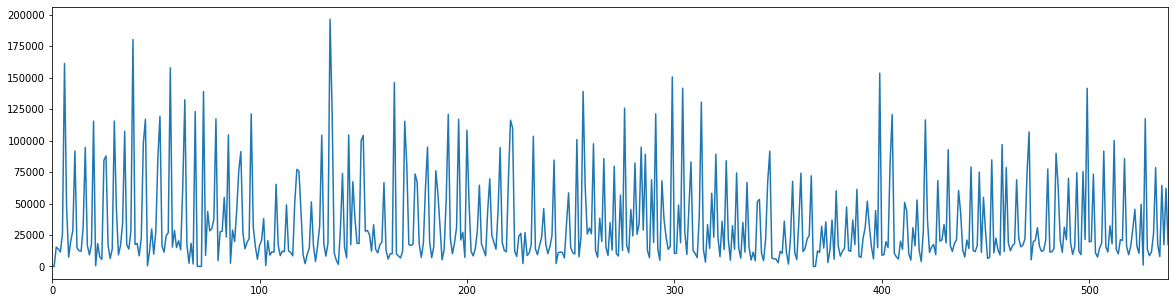

In [909]:
y.plot(figsize=(20,5))

In [910]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)
X2 = X2.values.reshape(-1,1)
y2 = y2.values.reshape(-1,1)
X3 = X3.values.reshape(-1,1)
y3 = y3.values.reshape(-1,1)
X4 = X4.values.reshape(-1,1)
y4 = y4.values.reshape(-1,1)
alvo = alvo.values.reshape(-1,1)
alvo2 = alvo2.values.reshape(-1,1)
alvo3 = alvo3.values.reshape(-1,1)
alvo4 = alvo4.values.reshape(-1,1)

In [911]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.40, random_state=42)

X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(X2, y2, test_size=0.40, random_state=42)
X_treino3, X_teste3, y_treino3, y_teste3 = train_test_split(X3, y3, test_size=0.40, random_state=42)
X_treino4, X_teste4, y_treino4, y_teste4 = train_test_split(X4, y4, test_size=0.40, random_state=42)



In [912]:
X

array([['2016-08-29T00:00:00.000000000'],
       ['2016-08-30T00:00:00.000000000'],
       ['2016-08-31T00:00:00.000000000'],
       ['2016-09-01T00:00:00.000000000'],
       ['2016-09-02T00:00:00.000000000'],
       ['2016-09-03T00:00:00.000000000'],
       ['2016-09-04T00:00:00.000000000'],
       ['2016-09-07T00:00:00.000000000'],
       ['2016-09-08T00:00:00.000000000'],
       ['2016-09-09T00:00:00.000000000'],
       ['2016-09-10T00:00:00.000000000'],
       ['2016-09-11T00:00:00.000000000'],
       ['2016-09-14T00:00:00.000000000'],
       ['2016-09-15T00:00:00.000000000'],
       ['2016-09-16T00:00:00.000000000'],
       ['2016-09-17T00:00:00.000000000'],
       ['2016-09-18T00:00:00.000000000'],
       ['2016-09-21T00:00:00.000000000'],
       ['2016-09-22T00:00:00.000000000'],
       ['2016-09-23T00:00:00.000000000'],
       ['2016-09-25T00:00:00.000000000'],
       ['2016-09-26T00:00:00.000000000'],
       ['2016-09-28T00:00:00.000000000'],
       ['2016-09-29T00:00:00.00000

In [913]:
clf = ensemble.GradientBoostingRegressor()
clf.fit(X_treino, y_treino)

/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [914]:
mse = metrics.mean_squared_error(y_teste, clf.predict(X_teste))
print("MSE: %.4f" % mse)
clf.fit(X_treino2, y_treino2)
mse = metrics.mean_squared_error(y_teste2, clf.predict(X_teste2))
print("MSE: %.4f" % mse)
clf.fit(X_treino3, y_treino3)
mse = metrics.mean_squared_error(y_teste3, clf.predict(X_teste3))
print("MSE: %.4f" % mse)
clf.fit(X_treino4, y_treino4)
mse = metrics.mean_squared_error(y_teste4, clf.predict(X_teste4))
print("MSE: %.4f" % mse)


MSE: 1721621133.3780
MSE: 14925826.0958
MSE: 45211742.4884
MSE: 62277880.2792


/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [915]:
rfg = RandomForestRegressor(n_estimators=10, random_state=42)

rfg.fit(X_treino, y_treino)
mse = metrics.mean_squared_error(y_teste, rfg.predict(X_teste))
print("MSE: %.4f" % mse)

clf.fit(X_treino2, y_treino2)
mse = metrics.mean_squared_error(y_teste2, rfg.predict(X_teste2))
print("MSE: %.4f" % mse)
clf.fit(X_treino3, y_treino3)
mse = metrics.mean_squared_error(y_teste3, rfg.predict(X_teste3))
print("MSE: %.4f" % mse)
clf.fit(X_treino4, y_treino4)
mse = metrics.mean_squared_error(y_teste4, rfg.predict(X_teste4))
print("MSE: %.4f" % mse)

rfg.fit(X_treino, y_treino)
mse = metrics.mean_squared_error(alvo, rfg.predict(alvo.data))
print("MSE: %.4f" % mse)

clf.fit(X_treino2, y_treino2)
mse = metrics.mean_squared_error(alvo2, rfg.predict(alvo2.data))
print("MSE: %.4f" % mse)
clf.fit(X_treino3, y_treino3)
mse = metrics.mean_squared_error(alvo3, rfg.predict(alvo3.data))
print("MSE: %.4f" % mse)
clf.fit(X_treino4, y_treino4)
mse = metrics.mean_squared_error(alvo4, rfg.predict(alvo4.data))
print("MSE: %.4f" % mse)


MSE: 2143545391.7437
MSE: 513576860.9325
MSE: 225905916.5839
MSE: 387534213.0931
MSE: 3413051620.5275
MSE: 86037646.0442
MSE: 28963589.8184
MSE: 39679309.3443


/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diogo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A col